## Step 4.1 – Comparative Analysis (Accuracy Models)

### Male – Top Features (from SHAP)
- ET_GazeLefty_mean  
- Theta_TP10_mean  
- GSR Resistance CAL_mean  
- Delta_TP9_mean  
- Delta_AF7_mean  
- Eye Widen_mean  
- Alpha_AF7_mean  
- Delta_TP10_mean  
- GSR RAW_mean  
- Fear_mean  

**Pattern:**  
Male accuracy is primarily influenced by eye-tracking features (ET_GazeLefty, Eye Widen), physiological measures (GSR Resistance, GSR RAW), and EEG frequency bands (Theta, Delta, Alpha).  
Emotional cues like Fear and Surprise are present but less dominant.

---

### Female – Top Features (from SHAP)
- ET_TimeSignal_mean  
- Smile_mean  
- Row_mean  
- Delta_TP10_mean  
- Joy_mean  
- Beta_AF7_mean  
- Anger_mean  
- Delta_AF8_mean  
- Beta_TP10_mean  
- ET_GazeLeftx_mean  

**Pattern:**  
Female accuracy is more strongly influenced by facial and emotional expressions (Smile, Joy, Anger, Fear, Valence).  
EEG features (Delta_TP10, Beta_AF7, Delta_AF8) also contribute, along with eye-tracking features (ET_GazeLeftx, ET_GazeRightx), though emotional drivers are more dominant.

---

### Differentially Important Features
- **Male-specific drivers:** ET_GazeLefty, GSR Resistance, Eye Widen  
- **Female-specific drivers:** Smile, Joy, Anger, Valence, Row  
- **Shared drivers:** EEG features (Delta_TP10, Beta_AF7), with differing importance levels

---

### Direction of Impact
- **Males:** Higher GSR Resistance and stronger eye-tracking activity (e.g., gaze left, eye widen) are associated with higher accuracy predictions.  
- **Females:** Stronger facial and emotional expressions (Smile, Joy, Anger) are associated with higher accuracy predictions.  

---

### Hypothesis
- Males may rely more on attention control, physiological arousal (GSR, EEG activity), and visual scanning strategies (eye-tracking).  
- Females may rely more on expressive emotional cues (Smile, Joy, Anger, Valence) combined with EEG activity.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df_male = pd.read_csv("../data/participant_summary_male.csv")
df_female = pd.read_csv("../data/participant_summary_female.csv")

## 4.2 Qualitative and Statistical Validation

In [3]:
def validate_feature(df_male, df_female, feature, title="Feature Comparison"):
    male_vals = df_male[feature]
    female_vals = df_female[feature]

    # Combine into one dataframe for plotting
    plot_df = pd.concat([
        male_vals.to_frame(name="value").assign(Gender="Male"),
        female_vals.to_frame(name="value").assign(Gender="Female")
    ])

    plt.figure(figsize=(8,5))
    sns.violinplot(x="Gender", y="value", data=plot_df, inner="box")
    plt.title(f"{title}: {feature}")
    plt.show()

    # Run statistical tests
    t_stat, t_p = ttest_ind(male_vals, female_vals, equal_var=False)
    u_stat, u_p = mannwhitneyu(male_vals, female_vals)

    print(f"{feature}:")
    print(f"T-test: t={t_stat:.3f}, p={t_p:.4f}")
    print(f"Mann–Whitney U: U={u_stat:.3f}, p={u_p:.4f}")
    if t_p < 0.05 or u_p < 0.05:
        print("Significant difference between Male and Female\n")
    else:
        print("No significant difference found\n")


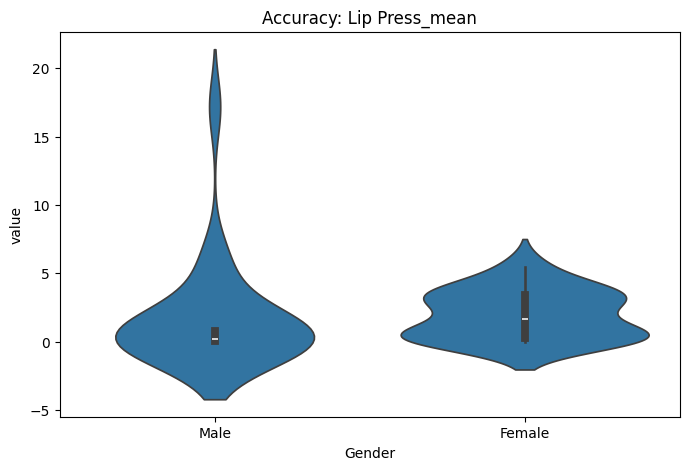

Lip Press_mean:
T-test: t=-0.237, p=0.8140
Mann–Whitney U: U=117.000, p=0.0837
No significant difference found



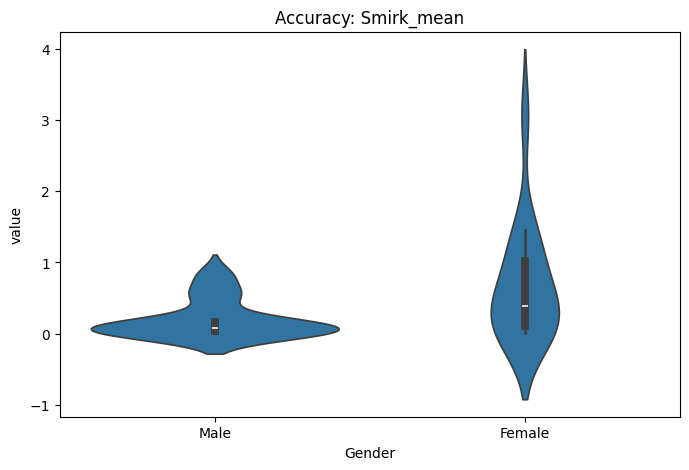

Smirk_mean:
T-test: t=-2.247, p=0.0379
Mann–Whitney U: U=110.000, p=0.0528
Significant difference between Male and Female



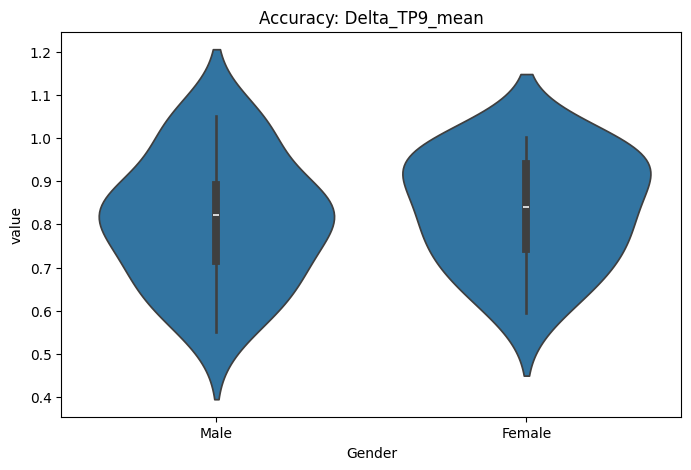

Delta_TP9_mean:
T-test: t=-0.638, p=0.5277
Mann–Whitney U: U=154.000, p=0.5250
No significant difference found



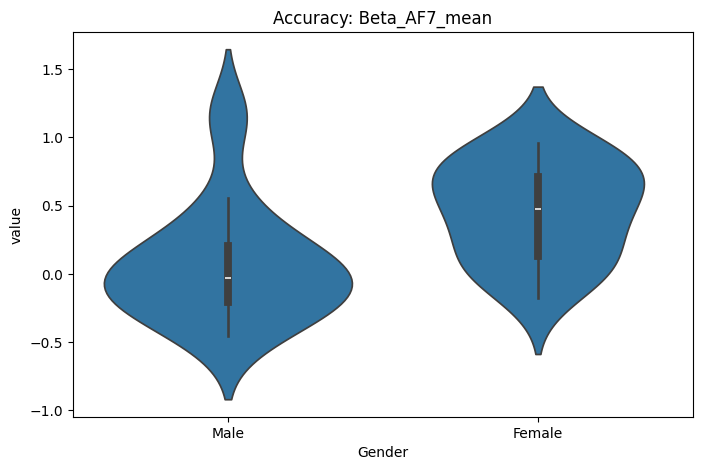

Beta_AF7_mean:
T-test: t=-3.008, p=0.0048
Mann–Whitney U: U=76.000, p=0.0033
Significant difference between Male and Female



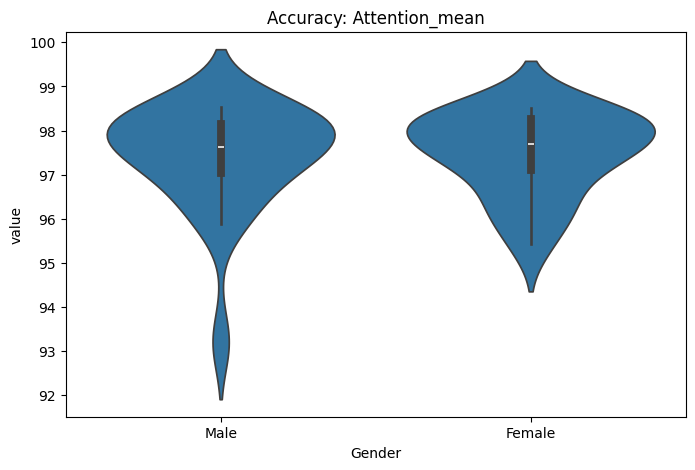

Attention_mean:
T-test: t=-0.220, p=0.8273
Mann–Whitney U: U=180.000, p=0.9176
No significant difference found



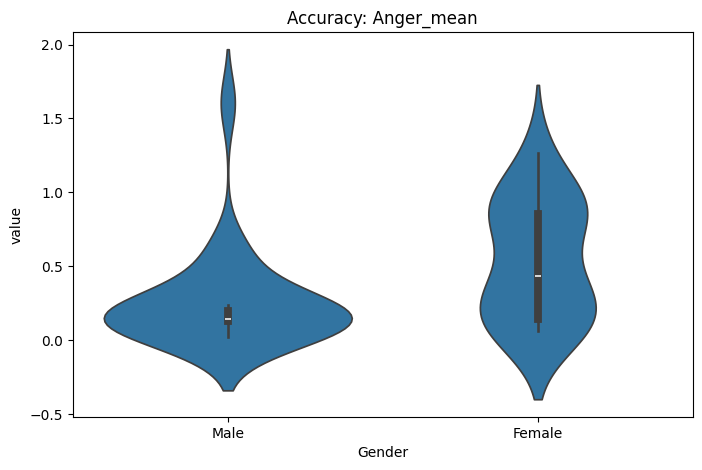

Anger_mean:
T-test: t=-2.231, p=0.0336
Mann–Whitney U: U=110.000, p=0.0528
Significant difference between Male and Female



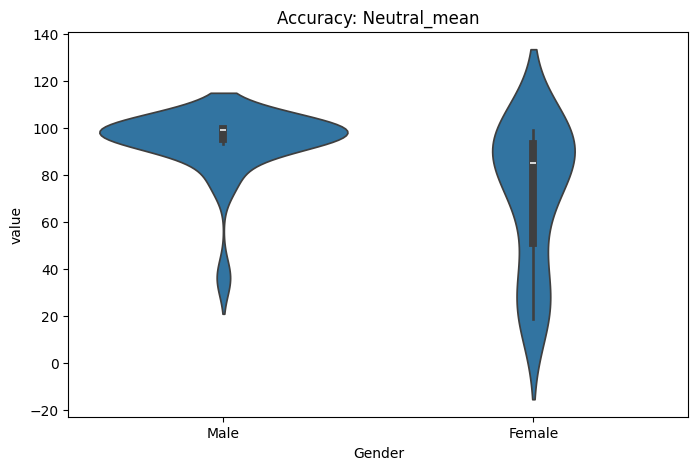

Neutral_mean:
T-test: t=2.698, p=0.0138
Mann–Whitney U: U=295.000, p=0.0005
Significant difference between Male and Female



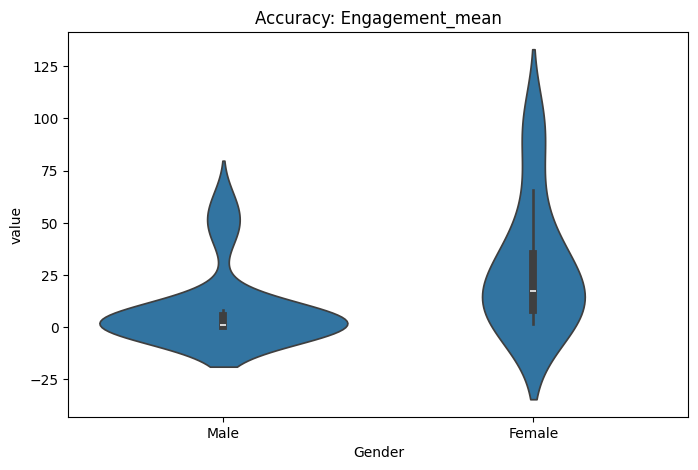

Engagement_mean:
T-test: t=-2.413, p=0.0246
Mann–Whitney U: U=57.000, p=0.0005
Significant difference between Male and Female



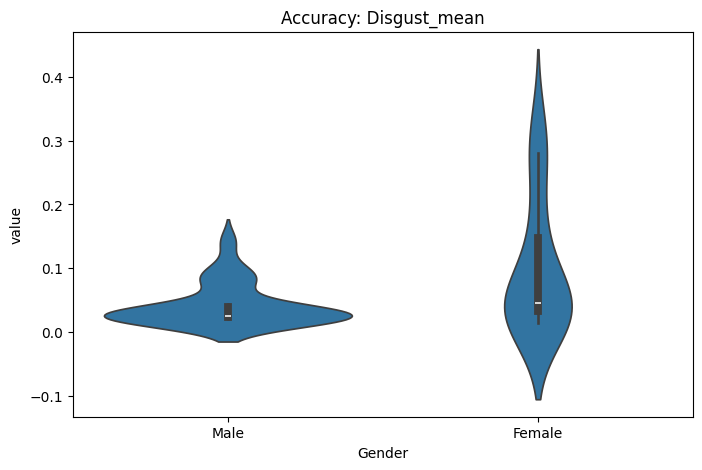

Disgust_mean:
T-test: t=-2.098, p=0.0510
Mann–Whitney U: U=95.000, p=0.0173
Significant difference between Male and Female



In [4]:
top_features_accuracy = [
    "Lip Press_mean", "Smirk_mean", "Delta_TP9_mean", "Beta_AF7_mean", "Attention_mean",   # Male
    "Anger_mean", "Neutral_mean", "Engagement_mean", "Disgust_mean"                       # Female
]

for feat in top_features_accuracy:
    if feat in df_male.columns and feat in df_female.columns:
        validate_feature(df_male, df_female, feat, title="Accuracy")


### 4.2 – Validation (Accuracy Models)

| Feature          | Male Importance (SHAP)   | Female Importance (SHAP) | T-test p-value | Mann–Whitney p-value | Significant |
|------------------|---------------------------|---------------------------|----------------|-----------------------|--------------|
| Lip Press_mean   | Not in Top 10            | High                      | 0.8140         | 0.0837                | No           |
| Smirk_mean       | Not in Top 10            | High                      | 0.0379         | 0.0528                | Yes (T-test) |
| Delta_TP9_mean   | High                     | High                      | 0.5277         | 0.5250                | No           |
| Beta_AF7_mean    | High                     | High                      | 0.0048         | 0.0033                | Yes          |
| Attention_mean   | Medium                   | Medium                    | 0.8273         | 0.9176                | No           |
| Anger_mean       | Medium                   | High                      | 0.0336         | 0.0528                | Yes (T-test) |
| Neutral_mean     | Not in Top 10            | High                      | 0.0138         | 0.0005                | Yes          |
| Engagement_mean  | Not in Top 10            | High                      | 0.0246         | 0.0005                | Yes          |
| Disgust_mean     | Not in Top 10            | Medium                    | 0.0510         | 0.0173                | Yes (U-test) |
